In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

file_path = r"D:\powerpulse_project\data\individual+household+electric+power+consumption\household_power_consumption.txt"

In [3]:

df=pd.read_csv(file_path,
               sep=';',
               parse_dates=[[0,1]],
               infer_datetime_format=True,
               na_values=['?'],
               low_memory=False)
#Rename the combined datetime column
df.rename(columns={'Date_Time': 'datetime'}, inplace=True)

#Display basic info
print("Dataset loaded!")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\1531066586.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df=pd.read_csv(file_path,
C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\1531066586.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv(file_path,
C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\1531066586.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv(file_path,


Dataset loaded!
Shape of dataset: (2075259, 8)
Columns: ['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:

#checking missing values
df.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

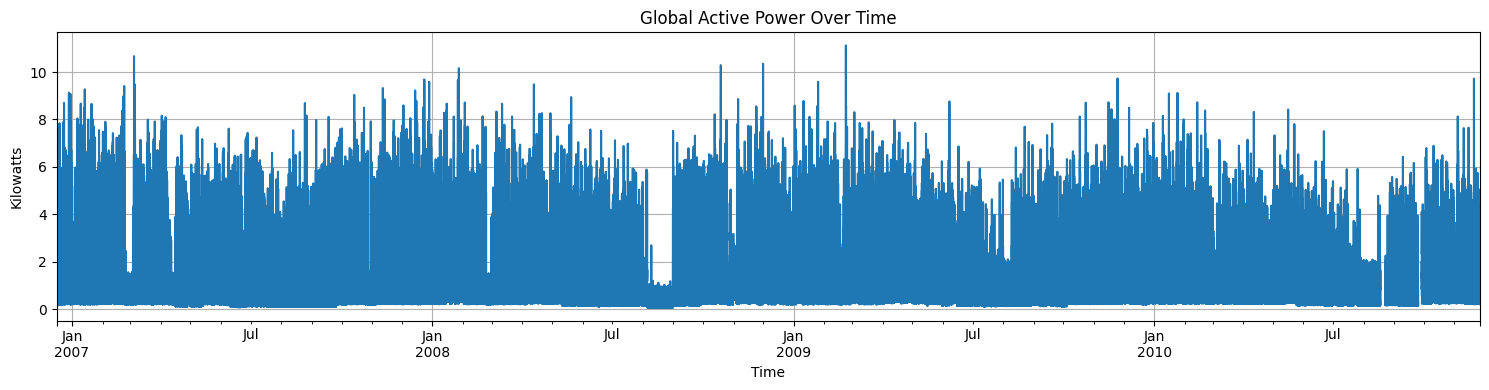

In [5]:

# convert revelant columns to numeric
cols_to_convert=df.columns.drop('datetime')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
#  Set datetime as index
df.set_index('datetime', inplace=True)

# Line plot of Global Active Power
df['Global_active_power'].plot(figsize=(15, 4), title='Global Active Power Over Time')
plt.ylabel('Kilowatts')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:

print("\n Descriptive Statistics:")
print(df.describe())



 Descriptive Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  


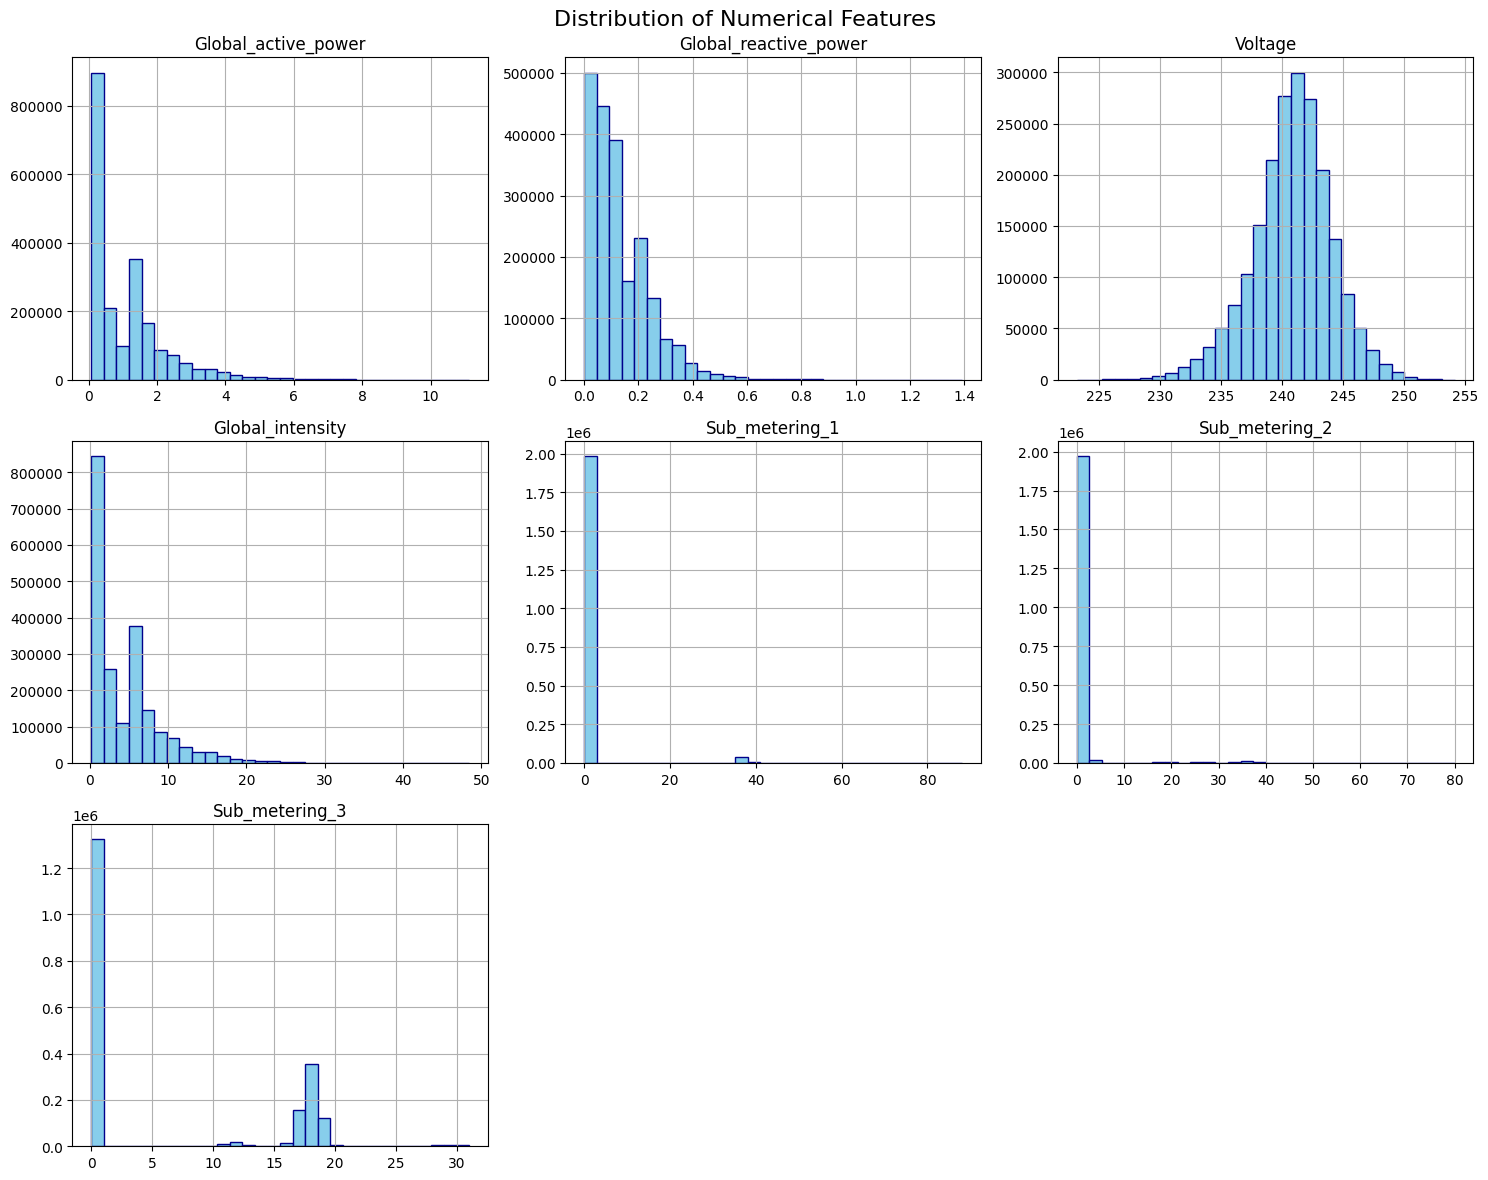

In [7]:
# Histogram of all numeric columns
df.hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='darkblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


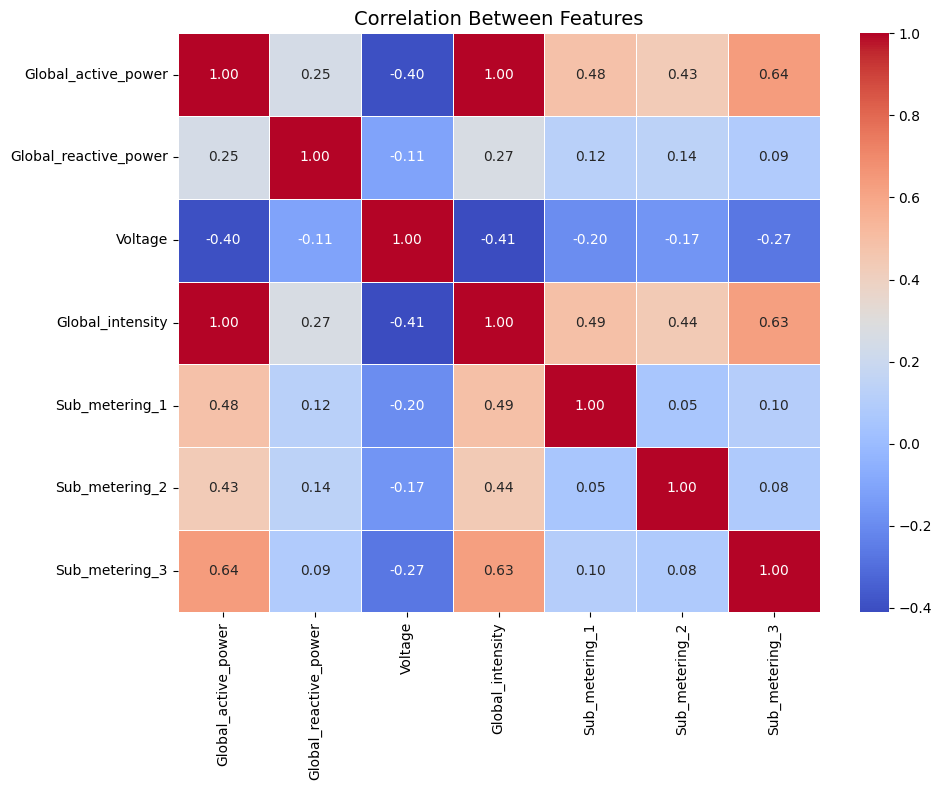

In [8]:
#  Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Features', fontsize=14)
plt.tight_layout()
plt.show()


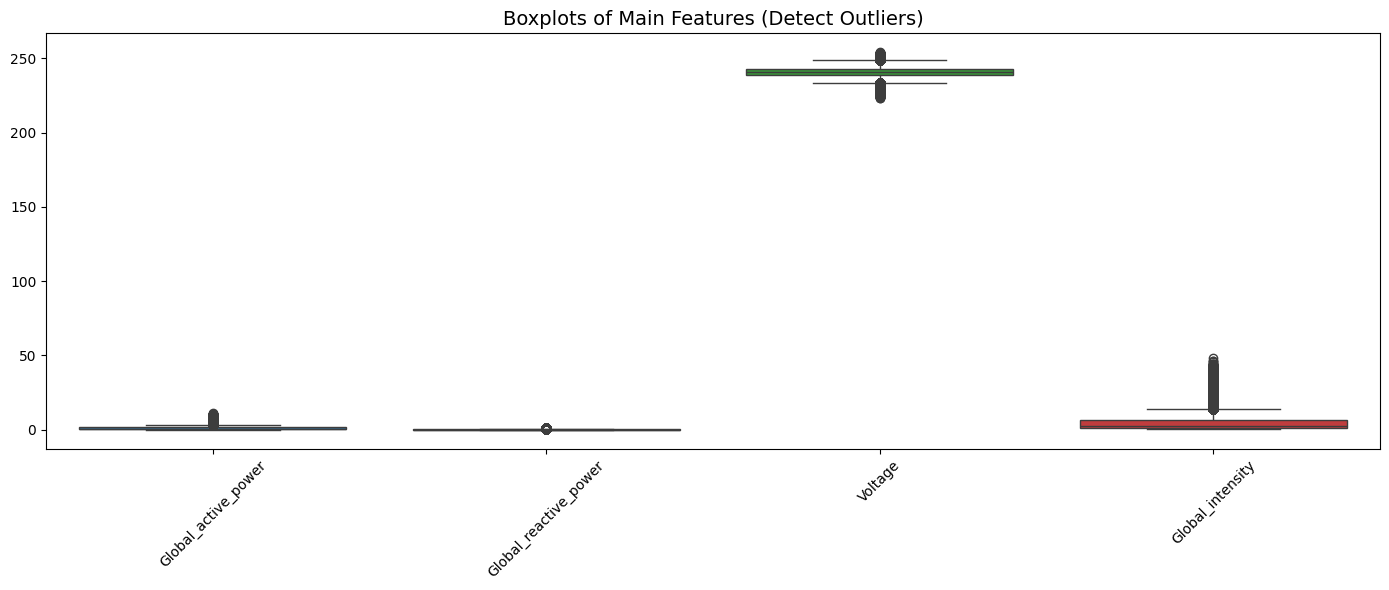

In [9]:
#  Boxplots to Detect Outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.title('Boxplots of Main Features (Detect Outliers)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

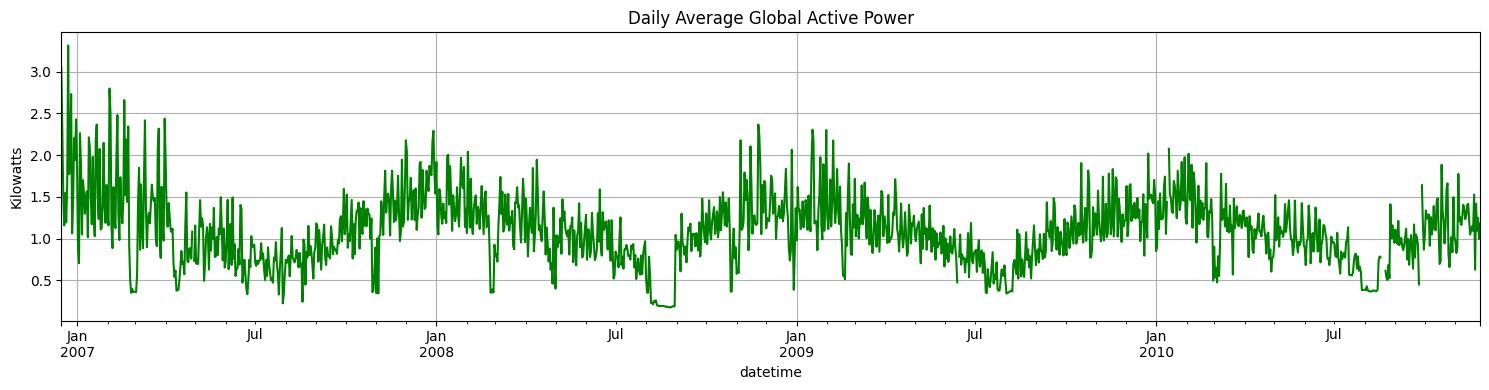

In [10]:
#  Daily Resample of Global Active Power
df_daily = df['Global_active_power'].resample('D').mean()
plt.figure(figsize=(15, 4))
df_daily.plot(title='Daily Average Global Active Power', ylabel='Kilowatts', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
#  Time-based Feature Extraction (Optional – used in modeling)
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.dayofweek

In [12]:

import numpy as np

#Cyclical Encoding for hour and weekday
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

#Rolling Mean Features (to smooth out noise)
df['rolling_3h'] = df['Global_active_power'].rolling(window=3).mean()
df['rolling_24h'] = df['Global_active_power'].rolling(window=24).mean()

#Lag Features (to introduce time memory)
df['lag_1h'] = df['Global_active_power'].shift(1)
df['lag_24h'] = df['Global_active_power'].shift(24)

#Drop rows with NaN due to rolling or lag
df.dropna(inplace=True)

print("Feature Engineering completed. New shape:", df.shape)


Feature Engineering completed. New shape: (2047594, 19)


In [13]:
#  Train-Test Split
from sklearn.model_selection import train_test_split

#Define target and features
target = 'Global_active_power'
features = df.drop(columns=[target])  # All except the target
X = features.select_dtypes(include='number')  # Select only numeric features
y = df[target]

#Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1638075, 18)
Testing data shape: (409519, 18)


In [14]:
#  Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test)

# Evaluate performance
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Results:")
print("RMSE:", round(lr_rmse, 4))
print("MAE:", round(lr_mae, 4))
print("R² Score:", round(lr_r2, 4))


Linear Regression Results:
RMSE: 0.0394
MAE: 0.0251
R² Score: 0.9986


In [15]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate performance
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n Random Forest Regressor Results:")
print("RMSE:", round(rf_rmse, 4))
print("MAE:", round(rf_mae, 4))
print("R² Score:", round(rf_r2, 4))



 Random Forest Regressor Results:
RMSE: 0.0216
MAE: 0.0098
R² Score: 0.9996


In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor   

# Train Gradient Boosting Regressor    
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                     max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_preds = gb_model.predict(X_test)

# Evaluate performance
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)

print("\n Gradient Boosting Regressor Results:")
print("RMSE:", round(gb_rmse, 4))
print("MAE:", round(gb_mae, 4))
print("R² Score:", round(gb_r2, 4))



 Gradient Boosting Regressor Results:
RMSE: 0.0258
MAE: 0.015
R² Score: 0.9994


In [17]:
# Neural Network Regressor
from sklearn.neural_network import MLPRegressor

# Train Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32),  # two hidden layers
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=42)

nn_model.fit(X_train, y_train)

# Make predictions
nn_preds = nn_model.predict(X_test)

# Evaluate performance
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_mae = mean_absolute_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)

print("\n Neural Network (MLP Regressor) Results:")
print("RMSE:", round(nn_rmse, 4))
print("MAE:", round(nn_mae, 4))
print("R² Score:", round(nn_r2, 4))



 Neural Network (MLP Regressor) Results:
RMSE: 0.031
MAE: 0.0212
R² Score: 0.9991


In [25]:

import pandas as pd
lr_rmse, rf_rmse, gb_rmse, mlp_rmse = 0.0394, 0.0216, 0.0258, 0.031
lr_mae, rf_mae, gb_mae, mlp_mae = 0.0251, 0.0098, 0.015, 0.0212
lr_r2, rf_r2, gb_r2, mlp_r2 = 0.9986, 0.9996, 0.9994, 0.9991


# Instead of re-training, directly store your saved evaluation metrics
results_data = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Neural Network (MLP)"],
    "RMSE": [lr_rmse, rf_rmse, gb_rmse, mlp_rmse],  
    "R2":   [lr_r2, rf_r2, gb_r2, mlp_r2],   
    "MAE":  [lr_mae, rf_mae, gb_mae, mlp_mae]    
}

results_df = pd.DataFrame(results_data)
print(results_df)


                  Model    RMSE      R2     MAE
0     Linear Regression  0.0394  0.9986  0.0251
1         Random Forest  0.0216  0.9996  0.0098
2     Gradient Boosting  0.0258  0.9994  0.0150
3  Neural Network (MLP)  0.0310  0.9991  0.0212



 Model Performance Comparison:

                  Model    RMSE      R2     MAE
0     Linear Regression  0.0394  0.9986  0.0251
1         Random Forest  0.0216  0.9996  0.0098
2     Gradient Boosting  0.0258  0.9994  0.0150
3  Neural Network (MLP)  0.0310  0.9991  0.0212


C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\1871463482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="viridis")
C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\1871463482.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="magma")


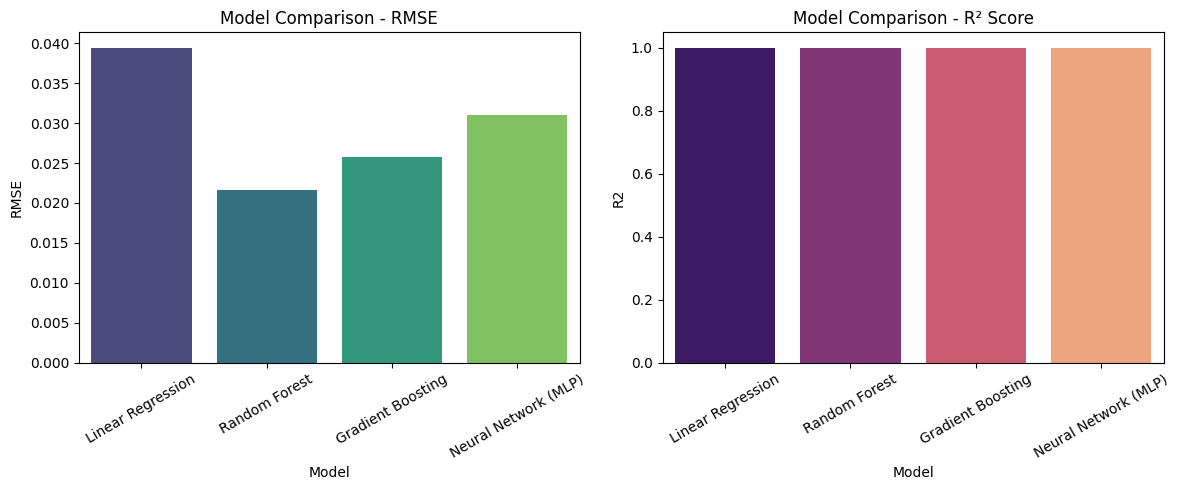

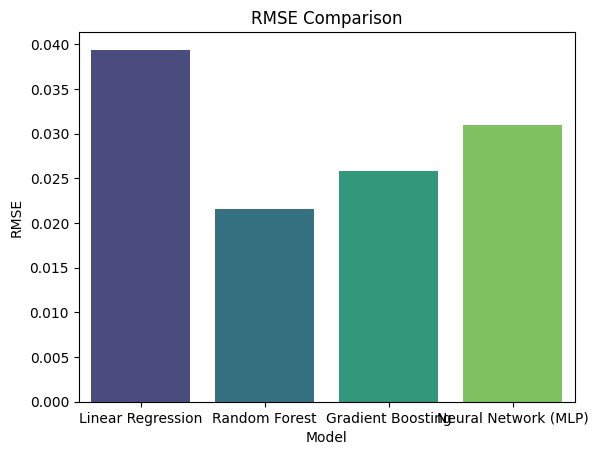

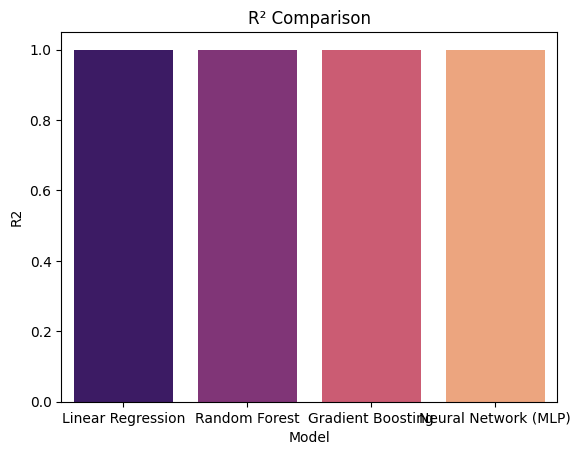

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Convert results list into DataFrame
results_df = pd.DataFrame(results_df)

#  Display table
print("\n Model Performance Comparison:\n")
print(results_df)

#  Visualization: RMSE & R² Comparison
plt.figure(figsize=(12,5))

# RMSE Plot
plt.subplot(1,2,1)
sns.barplot(x="Model", y="RMSE", data=results_df, palette="viridis")
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=30)

# R² Plot
plt.subplot(1,2,2)
sns.barplot(x="Model", y="R2", data=results_df, palette="magma")
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# RMSE Barplot
sns.barplot(x="Model", y="RMSE", hue="Model", data=results_df, palette="viridis", legend=False)
plt.title("RMSE Comparison")
plt.show()

# R2 Barplot
sns.barplot(x="Model", y="R2", hue="Model", data=results_df, palette="magma", legend=False)
plt.title("R² Comparison")
plt.show()


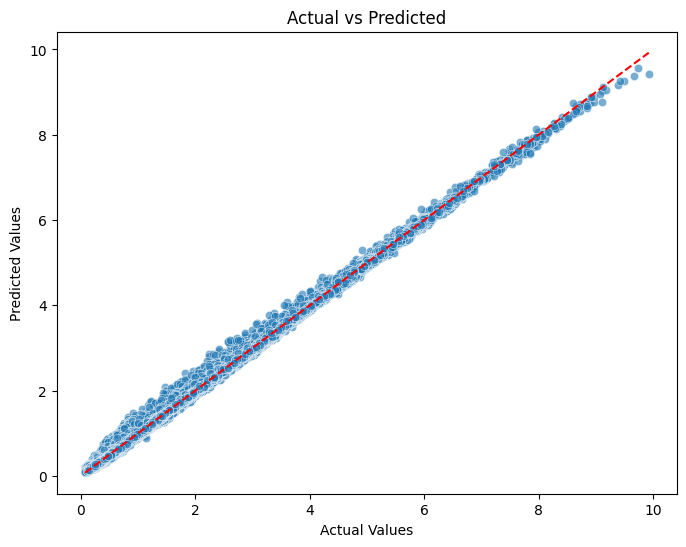

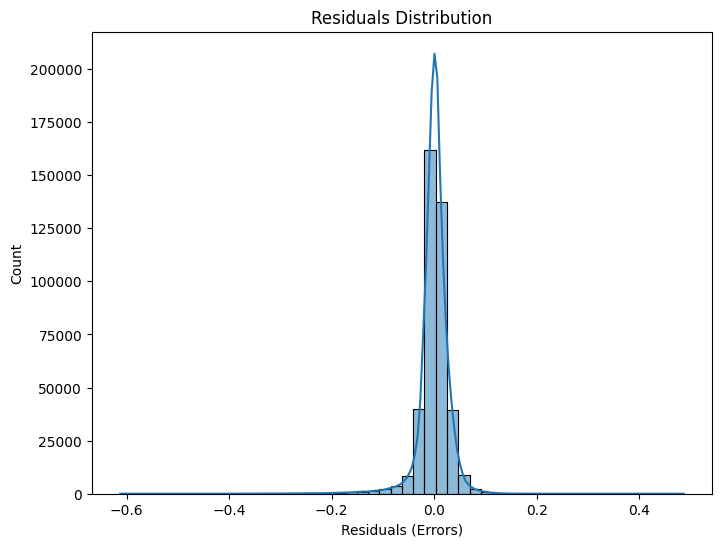

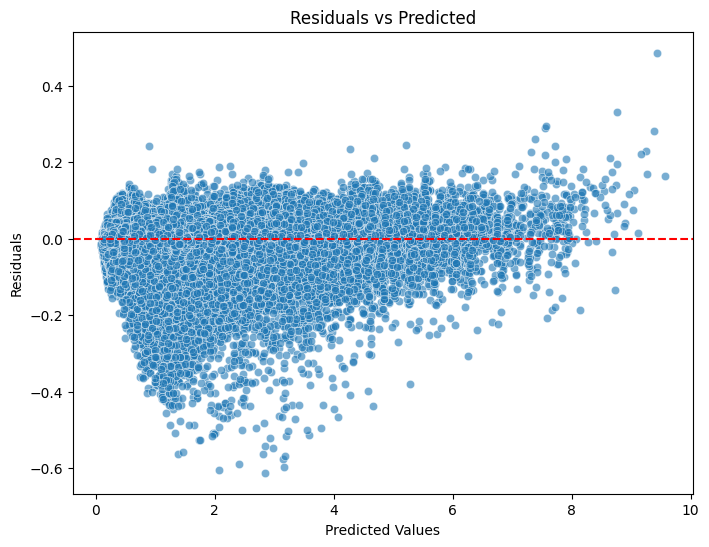

In [29]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Pick the best model (example: Gradient Boosting worked well for large data)
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

#  Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

#  Residuals Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals (Errors)")
plt.title("Residuals Distribution")
plt.show()

#  Residuals vs Predicted (check bias)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [ ]:
import joblib

#  Train final best model on full training data
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_model, "best_model.pkl")

print(" Scaler and Model saved successfully!")


 Scaler and Model saved successfully!


In [31]:
# Load saved model & scaler
loaded_scaler = joblib.load("scaler.pkl")
loaded_model = joblib.load("best_model.pkl")

# Example: Predict on new data
sample = X_test.iloc[:5]   # Take first 5 test rows
sample_scaled = loaded_scaler.transform(sample)
predictions = loaded_model.predict(sample_scaled)

print(" Predictions:", predictions)


 Predictions: [0.31801842 0.32213452 0.14601781 1.17106444 1.28972366]


C:\Users\ALDO\AppData\Local\Temp\ipykernel_1184\2840923667.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df.head(15), palette="viridis")


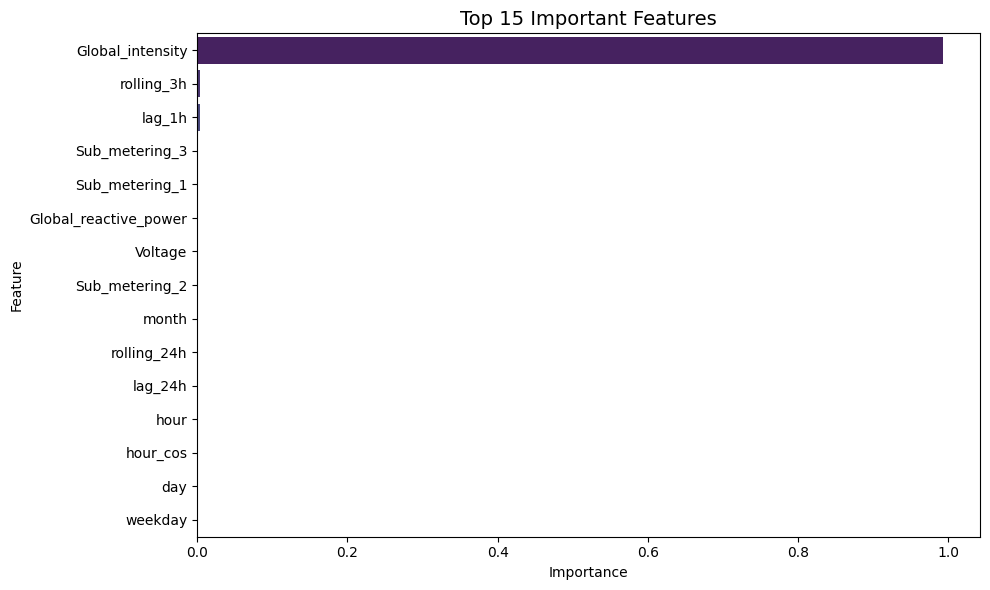

,Feature,Importance
2,Global_intensity,0.992383
14,rolling_3h,0.003581
16,lag_1h,0.003223
5,Sub_metering_3,0.000223
3,Sub_metering_1,0.000189
0,Global_reactive_power,0.000159
1,Voltage,0.000130
4,Sub_metering_2,0.000037
8,month,0.000030
15,rolling_24h,0.000019


In [32]:

# Feature Importance (RF / GB)
importances = best_model.feature_importances_
feature_names = X_train.columns

# Put into DataFrame for sorting
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(15), palette="viridis")
plt.title("Top 15 Important Features", fontsize=14)
plt.tight_layout()
plt.show()


fi_df.head(15)





In [33]:
# 
#FINAL MODEL EVOLUATION
# Choose the best model 
best_model = GradientBoostingRegressor(random_state=42)

# Retrain on the full dataset
best_model.fit(X, y)

# Evaluate on the test data
final_preds = best_model.predict(X_test)

# Calculate evaluation metrics
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_mae = mean_absolute_error(y_test, final_preds)
final_r2 = r2_score(y_test, final_preds)

print("\n Final Model Evaluation on Test Set")
print("RMSE:", round(final_rmse, 4))
print("MAE:", round(final_mae, 4))
print("R² Score:", round(final_r2, 4))



 Final Model Evaluation on Test Set
RMSE: 0.0317
MAE: 0.0189
R² Score: 0.9991


In [34]:
#Saving the Model and Scaler
# Save the model and scaler
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:

#  Define models dictionary

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64,32),
                                   activation='relu',
                                   solver='adam',
                                   max_iter=200,
                                   random_state=42)
}

#  Cross-validation for all models

from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2", n_jobs=-1)
    cv_results[name] = scores.mean()

print("Cross-validation Results (R²):")
for name, score in cv_results.items():
    print(f"{name}: {score:.4f}")


In [ ]:

#  Model Comparison (including tuned versions)

best_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": rf_grid.best_estimator_,
    "Gradient Boosting": gb_grid.best_estimator_,
    "Neural Network": nn_grid.best_estimator_
}

results = []
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((name, rmse, r2, mae))

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²", "MAE"])
print("\nFinal Model Comparison:")
print(results_df)


In [ ]:

#  Save the Best Model

import joblib

best_model_name = results_df.sort_values("R²", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]

joblib.dump(best_model, "best_energy_model.pkl")
print(f"\nBest model '{best_model_name}' saved as best_energy_model.pkl")
